## TP 4 : " Reaction - Diffusion Model ".
---
Binôme : Khaled Ibrahim & Servranckx Christophe.
---
Pour ce 4ème travail personnel, nous allons nous intéresser au modèle Gray-scott et à son système d'équations.

Le modèle Gray-Scott, comme nous l'avons vu dans l'introduction de ce TP, représente la réaction et la diffusion de deux espèces chimiques générique que l'on notera U et V. 

Dès lors, l'objectif sera ici, sous certaines conditions initiales (CI) et au bords (CB), de simuler l'interaction des deux espèces chimique qui réagissent entre-elle et se diffusent.

Pour se faire, nous aurons à discrétiser le système d'équation différentiel partielle (EDP) selon une discrétisation *forward* pour le temps et *central* pour l'espace et à implémenter notre système à deux dimensions comme nous l'avons fait tout au long de ce 4ème module.

---

##### 1. Rappel et développement théorique.
---

Comme nous l'avons vu, le modèle de Gray-Scott suit quelque règles qui permettent alors d'en déduire les EDP, reprises ci-dessous, pour les concentrations $u(x,y,t)$ et $v(x,y,t)$ des deux espèces chimiques U et V correspondante.


\begin{align}
\frac{\partial u}{\partial t} &= D_u \nabla ^2 u - uv^2 + F(1-u)\\
\frac{\partial v}{\partial t} &= D_v \nabla ^2 v + uv^2 - (F + k)v
\end{align}

avec, à gauche de ces égalités :     

* Les termes représentant la variation temporelle de la concentration de chaque espèce:  $\frac{\partial u}{\partial t} $ et $\frac{\partial v}{\partial t}$ 

et à droites :

* 1er terme : les termes de diffusion de chaque concentration où $Du$ et $Dv$ sont les taux respectif de diffusion et $\nabla^2$ le laplacien en coordonnée cartésienne à deux dimension.

* 2ème terme : les termes liés à la probabilité de trouver une espèce U ou V en fonction de sa concentration. C'est-à-dire, pour une molécule de l'espèce U, la probabilité de la trouver est proportionnel à $u$ tandis que pour une molécule de l'espèce V, cette probabilité est proportionnel à $v^2$ 

* dernier terme : les termes d'alimentation et de destruction des deux espèces chimiques. 

Notons enfin que les valeurs de $F$ et $k$ sont choisies comme paramètres et que le résultat de notre analyse découle du choix de ces derniers.

Pour la résolution de ce problème, il nous faudra tout d'abord discrétiser nos équations (1) et (2), nous discrétiserons ensuite les conditions aux bords de notre domaine qui ne sont autres que des CB de Neumann.

---

##### 2. Discrétisation des équations de réaction - diffusion et des conditions aux bords.
---

Nous disposons donc des équations,

\begin{align}
\frac{\partial u}{\partial t} &= D_u \nabla ^2 u - uv^2 + F(1-u)\\
\frac{\partial v}{\partial t} &= D_v \nabla ^2 v + uv^2 - (F + k)v
\end{align}

qu'il nous faut discrétiser. Comme indiqué dans l'énoncé de ce TP, nous discrétisons les équations de réaction-diffusion en utilisant les discrétisations *forward-time* et *centered-space*. Procédons tout d'abord à la discrétisation de l'équation (1).


---

#### 2.1 Discrétisation de l'équation (1).
---

Commençons par la discrétisation des dérivées temporelle et spatiale.

* Forward-time : 

$$ \frac{\partial u}{\partial t} \approx \frac{u^{n+1}_{i,j} - u^{n}_{i,j}}{\Delta t} $$

* centered-space : 

$$ \nabla ^2 u \approx \frac{u^{n}_{i+1,j} - 2u^{n}_{i,j} + u^{n}_{i-1,j}}{\Delta x^2} + \frac{u^{n}_{i,j+1} - 2u^{n}_{i,j} + u^{n}_{i,j-1}}{\Delta y^2} $$

$\hspace{0.8cm}$ ou en supposant que $ \Delta x = \Delta y = \delta$. 

$$→  \nabla ^2 u \approx \frac{1}{\delta ^2} \left[ \left( u^{n}_{i+1,j} - 2u^{n}_{i,j} + u^{n}_{i-1,j} \right) + \left( u^{n}_{i,j+1} - 2u^{n}_{i,j} + u^{n}_{i,j-1} \right) \right]$$

$\mbox{ }$

Notre équation discrétisée est ainsi donnée par :

$$
\begin{array}{}
\frac{u^{n+1}_{i,j} - u^{n}_{i,j}}{\Delta t} = \frac{D_u}{\delta ^2} \left[ \left( u^{n}_{i+1,j} - 2u^{n}_{i,j} + u^{n}_{i-1,j} \right) + \left( u^{n}_{i,j+1} - 2u^{n}_{i,j} + u^{n}_{i,j-1} \right) \right] - u^{n}_{i,j} \left( v^n_{i,j} \right) ^2 + F \left(1-u^{n}_{i,j} \right) 
\end{array}
$$

Où la seule inconnue est $u^{n+1}_{i,j}$. Dès lors, en isolant cette inconnue dans le membre de gauche:

$$
\begin{array}{}
u^{n+1}_{i,j}= u^{n}_{i,j} + \frac{D_u \Delta t}{\delta ^2} \left[ \left( u^{n}_{i+1,j} - 2u^{n}_{i,j} + u^{n}_{i-1,j} \right) + \left( u^{n}_{i,j+1} - 2u^{n}_{i,j} + u^{n}_{i,j-1} \right) \right] - \Delta{t} \mbox{ } u^{n}_{i,j} \left( v^n_{i,j} \right) ^2 + \Delta{t} \mbox{ } F \left(1-u^{n}_{i,j} \right)
\end{array}
$$

et en réarrangant quelque peu cette équation, nous obtenons :

$$
\begin{array}{}
\hspace{-3.0cm} u^{n+1}_{i,j} = \frac{D_u \Delta t}{\delta ^2} \left( u^{n}_{i+1,j} + u^{n}_{i-1,j} + u^{n}_{i,j+1} + u^{n}_{i,j-1} \right) + \left[ 1- \frac{4 D_u \Delta t}{\delta ^2} - \Delta{t} \mbox{ } \left( v^n_{i,j} \right) ^2 - \Delta{t} \mbox{ } F \right] u^{n}_{i,j} + \Delta{t} \mbox{ } F 
\end{array}
$$
 
Finalement, en posant $c_1 = \frac{D_u \Delta t}{\delta ^2}$, il en découle l'équation suivante:

$$
\begin{equation}
\hspace{-2.0cm} u^{n+1}_{i,j} = \Delta{t} \mbox{ } F + \left[ 1- 4 c_1 - \Delta{t} \mbox{ } \left( v^n_{i,j} \right) ^2 - \Delta{t} \mbox{ } F \right] u^{n}_{i,j} \hspace{0.9cm} + c_1 \left( u^{n}_{i+1,j} + u^{n}_{i-1,j} + u^{n}_{i,j+1} + u^{n}_{i,j-1} \right)
\end{equation}
$$

---

#### 2.2 Discrétisation de l'équation (2).
---

Nous procédons de manière identique à ce que nous venons d'éffectuer pour l'équation (1), e.g., nous commençons par discrétiser les dérivées temporelle et spatiale,

* Forward-time : 

$$ \frac{\partial v}{\partial t} \approx \frac{v^{n+1}_{i,j} - v^{n}_{i,j}}{\Delta t} $$

* centered-space : 

$$ \nabla ^2 v \approx \frac{v^{n}_{i+1,j} - 2v^{n}_{i,j} + v^{n}_{i-1,j}}{\Delta x^2} + \frac{v^{n}_{i,j+1} - 2v^{n}_{i,j} + v^{n}_{i,j-1}}{\Delta y^2} $$

$\hspace{0.8cm}$ Or, $ \Delta x = \Delta y = \delta$.

$$→  \nabla ^2 v \approx \frac{1}{\delta ^2} \left[ \left( v^{n}_{i+1,j} - 2v^{n}_{i,j} + v^{n}_{i-1,j} \right) + \left( v^{n}_{i,j+1} - 2v^{n}_{i,j} + v^{n}_{i,j-1} \right) \right]$$


$\mbox{}$


qui nous donne,

$$ 
\begin{array}{}
\frac{v^{n+1}_{i,j} - v^{n}_{i,j}}{\Delta t} = \frac{D_v}{\delta ^2} \left[ \left( v^{n}_{i+1,j} - 2v^{n}_{i,j} + v^{n}_{i-1,j} \right) + \left( v^{n}_{i,j+1} - 2v^{n}_{i,j} + v^{n}_{i,j-1} \right) \right] + u^{n}_{i,j} \left( v^{n}_{i,j} \right) ^2 - \left(F+k \right) v^{n}_{i,j}
\end{array}
$$

En isolant la seule inconnue $v^{n+1}_{i,j}$, nous avons alors:

$$ 
\begin{array}{}
v^{n+1}_{i,j} = v^{n}_{i,j} + \frac{D_v \Delta t}{\delta ^2} \left[ \left( v^{n}_{i+1,j} - 2v^{n}_{i,j} + v^{n}_{i-1,j} \right) + \left( v^{n}_{i,j+1} - 2v^{n}_{i,j} + v^{n}_{i,j-1} \right) \right] + \Delta{t} \mbox{ } u^{n}_{i,j} \left( v^{n}_{i,j} \right) ^2 - \Delta{t} \left(F+k \right) v^{n}_{i,j} 
\end{array}
$$

qui devient après un réarrangement et en posant $c_2 = \frac{D_v \Delta t}{\delta ^2}$ :

$$
\begin{equation}
\hspace{-3.0cm} v^{n+1}_{i,j} = \Delta{t} \mbox{ } u^{n}_{i,j} \left( v^{n}_{i,j} \right) ^2 + \left[ 1- 4 c_2 - \Delta{t} \mbox{ } \left( F+k \right)  \right] v^{n}_{i,j} \hspace{3.5cm} + c_2 \left( v^{n}_{i+1,j} + v^{n}_{i-1,j} + v^{n}_{i,j+1} + v^{n}_{i,j-1} \right) 
\end{equation}
$$

$\mbox{}$

Cette deuxième équation étant discrétisée, il ne nous reste plus qu'à discrétiser nos conditions aux bords.

---

#### 2.3 Conditions aux bords.
---


Pour notre problème, comme annoncé précédemment, les 4 bords du domaines sont soumis à la même CB à savoir, une CB de Neumann nulle. Or comme nous l'avons vu au fil des leçons de ce module, nous  pouvons approximer les CB de Neumann par des différences finies. Nous avons donc:

$$
\left\{
\begin{array}{}
\frac{\partial u}{\partial x} = \frac{\partial u}{\partial y} = q\\
\frac{\partial v}{\partial x} = \frac{\partial v}{\partial y} = q
\end{array}
\right.
$$

où $q=0$ (ce qui correspond à une paroie qui isole notre système de son environnement). 

Ainsi, à chaque pas de temps, nous avons (en se souvenant que $ \Delta x = \Delta y = \delta$):

* Pour u :

$$
\left\{
\begin{array}{}
\frac{\partial u}{\partial x} \approx \frac{u_{end,j} - u_{end-1,j}}{\Delta x} = q = 0 \mbox{ } → \mbox{ } u_{end,j} = u_{end-1,j}\\
\frac{\partial u}{\partial x} \approx \frac{u_{i,end} - u_{i,end-1}}{\Delta y} = q =0 \mbox{ } → \mbox{ } u_{i,end} = u_{i,end-1}
\end{array}
\right.
$$

* Pour v :

$$
\left\{
\begin{array}{}
\frac{\partial v}{\partial x} \approx \frac{v_{end,j} - v_{end-1,j}}{\Delta x} = q \mbox{ } → \mbox{ } v_{end,j} = v_{end-1,j}\\
\frac{\partial v}{\partial x} \approx \frac{v_{i,end} - v_{i,end-1}}{\Delta y} = q \mbox{ } → \mbox{ } v_{i,end} = v_{i,end-1}
\end{array}
\right.
$$

où les indices "end-1" correspondent à l'avant dernier indice de ligne ou de colonne.

#### 2.4 Récapitulatif.
---
Nous avons finalement réussi à discrétiser nos équations de réaction-diffusion ainsi que nos conditions aux bords que l'on a réunis ci-dessous:
* Equations de réaction-diffusion :
$$
\left\{
\begin{array}{}
u^{n+1}_{i,j} = \Delta{t} \mbox{ } F + \left[ 1- 4 c_1 - \Delta{t} \mbox{ } \left( v^n_{i,j} \right) ^2 - \Delta{t} \mbox{ } F \right] u^{n}_{i,j} \hspace{3.0cm} + c_1 \left( u^{n}_{i+1,j} + u^{n}_{i-1,j} + u^{n}_{i,j+1} + u^{n}_{i,j-1} \right)  \\
v^{n+1}_{i,j} = - \Delta{t} \mbox{ } u^{n}_{i,j} \left( v^{n}_{i,j} \right) ^2 + \left[ 1- 4 c_2 - \Delta{t} \mbox{ } \left( F+k \right)  \right] v^{n}_{i,j} \hspace{3.0cm} + c_2 \left( v^{n}_{i+1,j} + v^{n}_{i-1,j} + v^{n}_{i,j+1} + v^{n}_{i,j-1} \right)
\end{array}
\right.
$$
* Conditions aux bords de Neumann :
$$
\left\{
\begin{array}{}
u_{end,j} = u_{end-1,j} + q \delta\\
u_{i,end} = u_{i,end-1} + q \delta\\
v_{end,j} = v_{end-1,j} + q \delta\\
v_{i,end} = v_{i,end-1} + q \delta 
\end{array}
\right.
$$
Maintenant que nous disposons des bases essentielles à notre problème, passons à sa résolution.

---

##### 3. Résolution du problème et analyse.
---

Comme à notre habitude, commençons par importer les librairies dont nous aurons besoins.

In [1]:
%matplotlib inline
import numpy 
from matplotlib import pyplot
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16
import matplotlib.cm as cm

Nous initialisons ensuite les données du problème tel que le temps de simulation, le nombre de points de notre grille spatiale ou encore les taux de diffusion $D_u$ et $D_v$.

In [2]:
Du, Dv, F, k = 0.00016, 0.00008, 0.035, 0.065 # Bacteria 1 

n  = 192       # Nombre de points de la grille spatiale x et y
dh = 5/(n-1)   # dh correspond au petit delta de nos équations
T  = 8000      # Temps final de simulation
dt = .9 * dh**2 / (4*max(Du,Dv))   # pas de temps 
nt = int(T/dt) # Nombre de points de la grille temporelle
L  = 5         # Longueur des bords de notre domaine carré

c1 = Du*dt/(dh**2)   
c2 = Dv*dt/(dh**2)   

Pour les conditions initiales (valeurs initiales des concentrations de U et de V), nous téléchargeons le fichier reprenant les codes qui génèrent la configuration initiale de notre domaine.

Nous utilisons ensuite la fonction "$load()$" proposé par numpy, pour extraire du fichier que nous venons de télécharger notre configuration initiale.

In [3]:
uvinitial = numpy.load('./data/uvinitial.npz')
U = uvinitial['U']  # Extrait les concentrations de U pour tout point de notre domaine
V = uvinitial['V']  # Extrait les concentrations de V pour tout point de notre domaine

Nous pouvons à présent vérifier que notre configuration initiale a correctement été extraite et implémentée en réalisant deux graphiques de celle-ci. Un premier pour l'espèce U et un second pour l'espèce V.

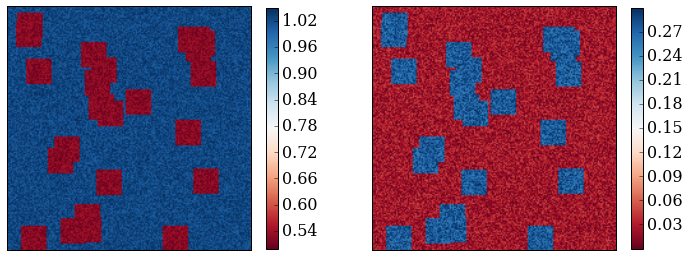

In [4]:
fig = pyplot.figure(figsize=(12,9))

pyplot.subplot(121)
pyplot.imshow(U, cmap = cm.RdBu)
pyplot.colorbar(shrink=.48);
pyplot.xticks([]), pyplot.yticks([]);

pyplot.subplot(122)
pyplot.imshow(V, cmap = cm.RdBu)
pyplot.colorbar(shrink=.48);
pyplot.xticks([]), pyplot.yticks([]);

Nous voyons agréablement que notre configuration initiale a été correctement implémentée. Notons tout de même que la réalisation de deux graphiques qui représentent exactement la même situation peut paraître inutile, toutefois elle nous permet de vérifier qu'il n'y a pas d'autre espèce que les espèces U et V dans notre domaine et donc que notre implémentation ai été correctement effectuée.

Nous allons maintenant définir la fonction qui va résoudre nos équations par la méthode d'Euler qui, pour rappel, est une méthode de résolution par itération sur le temps. 

Notre fonction prendra donc en entrée, les valeurs initiales de U et de V ainsi que les paramètres du problème (avec c1 et c2 nos constantes définies plus haut).

Une boucle for se chargera ensuite d'itérer sur le temps. À l'intérieur de cette dernière, une copie des valeurs de U et de V en tout point de notre domaine sera effectué afin de mettre à jour ces dernières. Viendront ensuite nos équations discrétisées et enfin l'imposition de nos conditions aux bords de Neumann.

En outre, notre fonction nous retournera un tableau de deux composantes : une première avec le tableau des valeurs de u et une seconde pour celles de v et ce pour le temps final $T=8000s$.
Voici donc notre fonction qui implémente ce que nous venons d'expliquer.

In [5]:
def Gray_scott(U, V, nt, c1, c2, F, k, dt):
    
    for t in range(nt):
        Un = U.copy()
        Vn = V.copy()
        
        U[1:-1,1:-1] = ((1-4*c1-dt*(Vn[1:-1,1:-1])**2-dt*F)* Un[1:-1,1:-1])\
             + c1*(Un[1:-1,2:] + Un[1:-1,:-2] + Un[2:,1:-1] + Un[:-2,1:-1])\
             + (dt*F) 
       
        V[1:-1,1:-1] = ((1-4*c2-dt*(F+k))* Vn[1:-1,1:-1])\
             + (dt*Un[1:-1,1:-1]*((Vn[1:-1,1:-1])**2))\
             + c2*(Vn[1:-1,2:] + Vn[1:-1,:-2] + Vn[2:,1:-1] + Vn[:-2,1:-1])
        
        # On impose des conditions aux bords de Neumann
    
        # Bord supérieur
        U[-1,:] = U[-2,:]
        V[-1,:] = V[-2,:]
        
        # Bord inférieur
        U[0,:]  = U[1,:]
        V[0,:]  = V[1,:]
        
        # Bord droit
        U[:,-1] = U[:,-2]
        V[:,-1] = V[:,-2]
        
        # Bord gauche
        U[:,0]  = U[:,1]
        V[:,0]  = V[:,1]

    return numpy.array([U,V])

Notre fonction étant définie, nous pouvons alors faire appel à elle afin de trouver nos solutions.

In [6]:
s = Gray_scott(U, V, nt, c1, c2, F, k, dt)   # Appel de notre fonction

Il ne nous reste alors qu'à ressortir les valeurs recherchées.
Pour se faire, nous stockons les valeurs de u renvoyées par notre fonction dans un tableau (qui sera ici uf) qui n'est autre que la composante 0 du tableau de sortie s. Ensuite, comme demandé dans l'énoncé, nous ressortons 5 valeurs prises à la 100ème ligne du tableau u en comptant par pas de 40.

In [7]:
uf = s[0]   # Valeurs de la concentration de l'espèce U au temps final

# On ressort les 5 valeurs recherchées
j = uf[100,::40]   

print("Concentrations de l'espèce U en les points recherchés:")
print("")

for i in range(5):
    if i<1:
        print("→ Le",i+1,"er chiffre recherché est :",round(j[i],4))
    elif i<=2:
        print("→ Le",i+1,"ème chiffre recherché est :",round(j[i],4))
    else:    
        print("→ Le",i+1,"ème chiffre recherché est :",round(j[i],5))

Concentrations de l'espèce U en les points recherchés:

→ Le 1 er chiffre recherché est : 0.9247
→ Le 2 ème chiffre recherché est : 0.8501
→ Le 3 ème chiffre recherché est : 0.6682
→ Le 4 ème chiffre recherché est : 0.90196
→ Le 5 ème chiffre recherché est : 0.90395


Ce qui s'avèrent-être les valeurs exactes (vis à vis des valeurs indiquées sur le site : http://openedx.seas.gwu.edu/courses/GW/MAE6286/2014_fall/info).

Afin de mieux se rendre compte de l'état de notre système, nous pouvons alors esquisser l'état de notre système au temps final $T=8000s$.

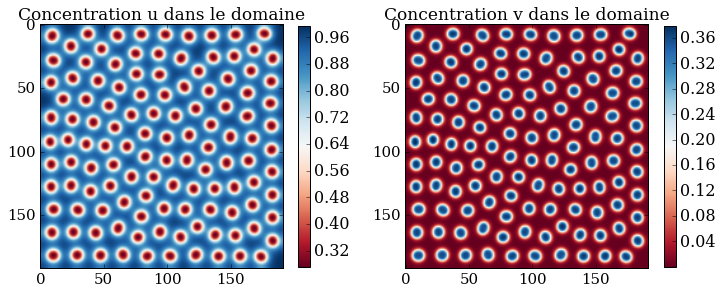

In [8]:
fig = pyplot.figure(figsize=(12,9))

pyplot.subplot(121)
pyplot.title("Concentration u dans le domaine", fontsize = 17)
pyplot.imshow(s[0], cmap = cm.RdBu)
pyplot.tick_params(axis='both', labelsize=15)
pyplot.colorbar(shrink=.48);

pyplot.subplot(122)
pyplot.title("Concentration v dans le domaine", fontsize = 17)
pyplot.imshow(s[1], cmap = cm.RdBu)
pyplot.tick_params(axis='both', labelsize=15)
pyplot.colorbar(shrink=.48);

Nous voyons donc par le biais de ces deux graphiques, la concentration en l'espèce U (graphique de gauche) et la concentration de l'espèce V en tout point du domaine.
Vis à vis de la configuration initiale, nous voyons que le domaine devient de moins en moins concentré en l'espèce U mais de plus en plus concentré en l'espèce V. Ceci correspond à nos attentes d'avoir une espèce V majoritaire dans le domaine étant donné la série de règle que doit suivre le modèle de Gray-Scott avec notamment :
$$
\begin{array}{}
2V+U\rightarrow 3V
\end{array}
$$
qui représente la "transformation" par deux unités de l'espèce V, d'une unité de l'espèce U en trois unités de l'espèce V.
Une animation pourrait alors mieux rendre compte de l'évolution de notre système au cours du temps. C'est précisémment ce que nous allons effectuer dans la section 5 de ce travail consacrée aux animations.
Avant cela, attardons nous un peu plus sur les résultats obtenus. Que nous renseignent-ils ? 
Comme nous l'avons dit, il s'agit des concentrations de l'espèce U en les points demandés. Mais quelles sont les valeurs de la concentration de l'espèce V ? Y a t'il conservation de "la quantité de matière" dans le domaine ?
Pour répondre à ces deux questions, nous commençons par ressortir les valeurs de la concentration de l'espèce V de manière similaire à ce que nous avons réaliser pour l'espèce U, e.g. nous stockons les valeurs de v dans un tableau etc.
Nous avons donc :

In [9]:
vf = s[1]   # Valeurs de la concentration de l'espèce V au temps final

# On ressort les 5 valeurs recherchées de v
h = vf[100,::40]
   
print("Concentrations de l'espèce V en les points recherchés: \n")  

for i in range(5):
    if i<1:
        print("→ Le",i+1,"er chiffre recherché est :",round(h[i],4) ,"\n")
    elif i<=2:
        print("→ Le",i+1,"ème chiffre recherché est :",round(h[i],4) ,"\n")
    else:    
        print("→ Le",i+1,"ème chiffre recherché est :",round(h[i],5) ,"\n")

Concentrations de l'espèce V en les points recherchés: 

→ Le 1 er chiffre recherché est : 0.0018 

→ Le 2 ème chiffre recherché est : 0.0198 

→ Le 3 ème chiffre recherché est : 0.1177 

→ Le 4 ème chiffre recherché est : 0.00679 

→ Le 5 ème chiffre recherché est : 0.00694 



Dès lors, si nous sommons ces deux concentrations, nous nous attendons à obtenir une valeur égale à l'unité en chacun des points.

NB : Nous faisons ici l'hypothèse que les volumes sont additifs.

In [10]:
print("concentrations en les espèces U et V aux points recherchés:")
print("")  

for i in range(5):
    if i<1:
        print("→ Le",i+1,"er chiffre recherché est :",round(j[i]+h[i],4) ,"\n")
    elif i<=2:
        print("→ Le",i+1,"ème chiffre recherché est :",round(j[i]+h[i],4) ,"\n")
    else:    
        print("→ Le",i+1,"ème chiffre recherché est :",round(j[i]+h[i],5) ,"\n")

concentrations en les espèces U et V aux points recherchés:

→ Le 1 er chiffre recherché est : 0.9265 

→ Le 2 ème chiffre recherché est : 0.8699 

→ Le 3 ème chiffre recherché est : 0.7859 

→ Le 4 ème chiffre recherché est : 0.90876 

→ Le 5 ème chiffre recherché est : 0.91089 



De manière assez étonnante, les valeurs obtenues ne sont pas égales à l'unité comme nous pouvions l'espérer. Comment expliquer cela ? Les volumes ne seraient-ils pas additifs comme supposer ? 

Après quelques recherches$^{1}$, il s'avère qu'une troisième espèce, P, est produite par la dégradation (suivant un certain taux k) de l'espèce V selon :

$$
\begin{array}{}
V\overset{k}{\longrightarrow}P
\end{array}
$$

Cette troisième espèce est inactive dans le domaine et est normalement évacué par un écoullement hors du domaine. 

Nous supposons donc que: par nos conditions de Neumann, aucun flux ne peut traverser les bords de notre domaine. Par conséquent, puisque l'espèce P reste dans le domaine, la concentration totale n'est pas uniquement dûe aux espèces U et V mais également à l'espèce P.

---

###### [1] Source : http://publications.lib.chalmers.se/records/fulltext/203896/203896.pdf

---
##### 4. Etude des patterns 
---
Remarque prémiminaire : Nous ne fournirons pas ici une étude approfondie des patterns via le modèle Gray-Scott mais nous mettrons en évidence quelque aspects de ceux-ci. Pour une études plus approfondie, nous vous renvoyons vers le site de M. Robert Munafo fournit dans les sources.
Interessons nous donc aux patterns obtenus en fonction des valeurs des paramètres F et k.

On commence par tester différentes valeurs de k en maintenant les autres paramètres fixes. En particulier nous choisissons$^{(*)}$ les valeurs de k suivantes : 0.060, 0.062 et 0.065 .

Du point de vue de l'implémentation de ceci, peu de changement sont à opérer par rapport à ce qui a précédemment effectué.

En effet, Les différentes valeurs de k sont tout d'abord reprises dans une liste que l'on nomme "q". Un tableau (nommée "u1") est ensuite initialisé. Ce nouveau tableau de trois composantes contiendra  nos trois tableau de valeurs de concentration de l'espèce U (pour tout point du domaine au temps final) pour un k différent. 

Une boucle for est ensuite lancée pour itérer sur les différentes valeurs de k. À l'intérieur de celle-ci nous rappelons simplement les conditions initiales suivit de notre fonction.

Enfin, les résultats obtenus sont stockés dans notre tableau u1 pour être utilisé plus tard.
Nous avons donc les codes suivants:
___
###### *   Ces valeurs ont été sélectionner après avoir réaliser un premier test avec les valeurs allant de $0.060$ à $0.065$ par pas de $0.001$ . Les valeurs non-reprises n'apportant rien de plus, nous avons chosis de ne pas les retenirs.

In [11]:
q = numpy.array([0.060,0.062,0.065])
u1 = numpy.empty((3,n,n))

for i in range(3):
    k = q[i] 

    U = uvinitial['U']
    V = uvinitial['V']
    
    d = Gray_scott(U, V, nt, c1, c2, F, k, dt)
    u1[i] = d[0]

On réalise alors les graphiques correspondant au résultat stocké dans notre tableau u1.

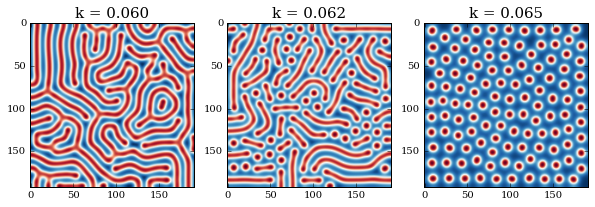

In [12]:
figure = pyplot.figure(figsize = (10, 5))

pyplot.subplot(131)
pyplot.title("k = 0.060", fontsize = 15)
pyplot.imshow(u1[0], cmap = cm.RdBu)
pyplot.tick_params(axis='both', labelsize=10)
    
pyplot.subplot(132)
pyplot.title("k = 0.062", fontsize = 15)
pyplot.imshow(u1[1], cmap = cm.RdBu)
pyplot.tick_params(axis='both', labelsize=10)
    
pyplot.subplot(133)
pyplot.title("k = 0.065", fontsize = 15)
pyplot.imshow(u1[2], cmap = cm.RdBu)
pyplot.tick_params(axis='both', labelsize=10)

Avant d'analyser ceci, nous procèdons au même exercice pour différente valeurs de F bien choisies.

In [13]:
f = numpy.array([0.030,0.033,0.035])
u2 = numpy.empty((3,n,n))

for i in range(3):
    F = f[i]
    k = 0.065

    U = uvinitial['U']
    V = uvinitial['V']
    
    d = Gray_scott(U, V, nt, c1, c2, F, k, dt)
    u2[i] = d[0]

D'où nous réalisons les graphiques correspondant aux différentes valeur de F.

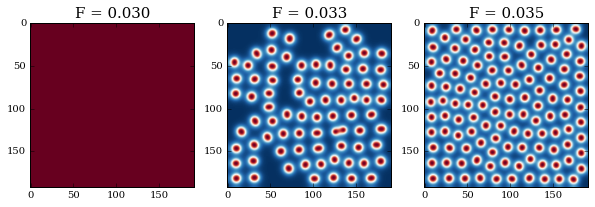

In [14]:
figure = pyplot.figure(figsize = (10, 5))

pyplot.subplot(131)
pyplot.title("F = 0.030", fontsize = 15)
pyplot.imshow(u2[0], cmap = cm.RdBu)
pyplot.tick_params(axis='both', labelsize=10)

pyplot.subplot(132)
pyplot.title("F = 0.033", fontsize = 15)
pyplot.imshow(u2[1], cmap = cm.RdBu)
pyplot.tick_params(axis='both', labelsize=10)

pyplot.subplot(133)
pyplot.title("F = 0.035", fontsize = 15)
pyplot.imshow(u2[2], cmap = cm.RdBu)
pyplot.tick_params(axis='both', labelsize=10)

Que pouvons nous à présent déduire de tout ceci ? 

Malheureusement pas grand chose à notre niveau hormis que la dépendance en les paramètres F et k est un "phénomène" non-linéaire, très sensible aux changements des valeurs de nos paramètres. Nous ne pouvons donc pas réellement en déduire de propriétes générales. 

Notons tout de même que pour certaines valeurs de F et k, nous pouvons retrouver des patterns similaires à ceux présent dans le règne animal,
![Image](./figures/zebrafish.jpg)

---
###### Figure 1. Cliché d'un Arothron Carte présentant un pattern que l'on peut reproduire par le modèle Gray-scott avec les paramètres repris sous le nom "zebrafish" dans l'énoncé de ce TP ( paramètres : $Du = 0.00016$, $Dv = 0.00008$, $F = 0.035$, $k = 0.060$).
###### Source :  http://effegua.myphotos.cc/PHP/Display_foto_Web.php?foto=Arothron%20mappa%20(pesce%20palla%20mappa)%20-%20Maldive.jpg&dir=../Maldive/Subacquee&lingua=italiano
---
 ou des mécanismes biologiques tel que la division cellulaire lorsqu'on utilise une animation comme nous le verrons dans la section consacrée aux animations.
 
En outre, voici une figure réalisée par M. Robert Munafo, reprenant l'ensemble des patterns que l'on peut obtenir en faisant varier les paramètres F et k dans le modèle Gray-Scott.

![Image](./figures/patterns.png)
###### Figure 2. Graphique des différents patterns que l'on peut obtenir par le Gray-Scott model en fonction des paramètre F et k réalisé par M. Robert Munafo et disponible (en accès libre) sur son site : http://mrob.com/pub/comp/xmorphia/index.html
---

---

##### 5. Animations
---

Dans cette nouvelle section consacrée aux animations nous allons tenter de réaliser une animation pour notre développement.

Pour se faire, nous allons dans un premier temps procéder comme auparavant lorsque nous réalisions des animations. Cette méthode étant adaptée pour les animation à "1 dimension", nous allons alors voir comment procéder pour réaliser une animation à "2 dimensions".

---

#### 1ère version : " À 1 Dimension"
---

Commençons par importer les librairies nécessaires à la réalisation d'animations

In [15]:
from matplotlib import animation
from IPython.display import HTML

et redéfinissons les paramètres F et k avec lesquelles nous avons travaillés jusqu'ici avant de rappeler notre fonction Gray-scott()

In [16]:
F, k = 0.035, 0.065 # Bacteria 1
s_anim = Gray_scott(U, V, nt, c1, c2, F, k, dt)

On réalise alors l'animation comme ce qui a été fait dans les travaux personnels précédents.

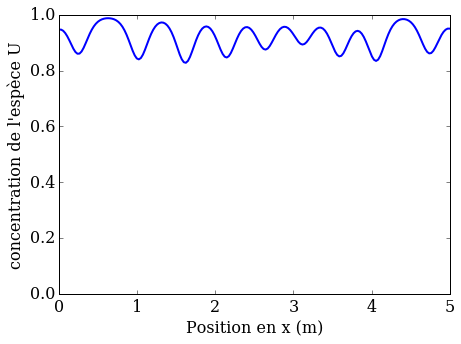

In [17]:
fig = pyplot.figure(figsize=(7,5));
ax = pyplot.axes(xlim=(0,5),ylim=(0,1),xlabel=('Position en x (m)'),ylabel=("concentration de l'espèce U"));
line, = ax.plot([],[],'b-', lw=2);

def animate(data):
    x = numpy.linspace(0,L,n)
    y = data
    line.set_data(x,y)
    return line,

anim = animation.FuncAnimation(fig, animate, frames=s_anim[0], interval=50)
HTML(anim.to_html5_video())

Remarque : La création du graphique sous l'animation est totalement indépendante de notre volontée et est lié à l'utilisation de html5. N'ayant pas trouvé comment supprimer l'affichage de ce dernier nous ne pouvons que nous en excuser.

Nous voyons donc sur cette première animation, l'ensemble des variations de la concentration de l'espèce U suivant les positions en $x$. Cela semble fonctionner correctement comme nous l'avons implémenté cependant nous désirons ici observer la variation de la concentration selon $x$ et $y$.

Pour se faire il nous faut procéder quelque peu différemment.

#### 2ème version : "À 2 dimensions "

Pour cette 2ème version, après avoir effectué quelque recherche dans la littérature de matplotlib, nous nous somme inspiré de ce qui a été fait ici :
http://matplotlib.org/examples/animation/dynamic_image2.html, e.g. :

Nous commençons par redéfinir quelque peu notre fonction Gray-scott() en introduisant un nouveau tableau nommé "U_tempo". Ce nouveau tableau contiendra l'ensemble de nos concentrations et ce pour chaque pas de temps ou presque ! 

En effet, nt (le pas de temps) valant 8301, la mémoire alloué serait trop grande pour ce que nous voulons faire. Nous avons alors décidés de ne sauvegarder qu'une solution tout les 100 pas de temps comme cela a été fait/mentionné pour les animations jouées dans l'énoncé de ce TP. Notre fonction nous retournera ainsi un tableau de 83 éléments (83 tableaux de tailles $n$ x $n$) qui constitueront les images de notre animation.

Notons enfin que la copie de chaque tableau de valeur sera assurée par un booléen qui ne sélectionnera et ne copiera qu'un tableau tout les 100 pas au moyen d'une simple comparaison entre l'indice de la boucle for et une liste de nombre créé à cet effet.

In [18]:
def Gray_scott_anim(U, V, nt, c1, c2, F, k, dt):
    
    U_tempo = numpy.empty(int(nt/100),dtype=numpy.ndarray)
    
    for i in range(nt):
        Un = U.copy()
        Vn = V.copy()
          
        U[1:-1,1:-1] = ((1-4*c1-dt*(Vn[1:-1,1:-1])**2-dt*F)* Un[1:-1,1:-1])\
             + c1*(Un[1:-1,2:] + Un[1:-1,:-2] + Un[2:,1:-1] + Un[:-2,1:-1])\
             + (dt*F) 
       
        V[1:-1,1:-1] = ((1-4*c2-dt*(F+k))* Vn[1:-1,1:-1])\
             + (dt*Un[1:-1,1:-1]*((Vn[1:-1,1:-1])**2))\
             + c2*(Vn[1:-1,2:] + Vn[1:-1,:-2] + Vn[2:,1:-1] + Vn[:-2,1:-1])
        
        # On impose des conditions aux bords de Neumann
    
        # Bord supérieur
        U[-1,:] = U[-2,:]
        V[-1,:] = V[-2,:]
        
        # Bord inférieur
        U[0,:]  = U[1,:]
        V[0,:]  = V[1,:]
        
        # Bord droit
        U[:,-1] = U[:,-2]
        V[:,-1] = V[:,-2]
        
        # Bord gauche
        U[:,0]  = U[:,1]
        V[:,0]  = V[:,1]

        # Sélectionne et copie un tableau tout les 100 pas 
        if i in numpy.arange(0,(nt-100),100):    
            U_tempo[int(i/100)] = U.copy()
        
    return U_tempo

On rappel alors les conditions initiales ainsi que nos paramètres F et k. Nous appelons ensuite notre nouvelle fonction Gray_scott_anim().

In [19]:
U = uvinitial['U']
V = uvinitial['V']

F, k = 0.035, 0.065 # Bacteria 1
p = Gray_scott_anim(U, V, nt, c1, c2, F, k, dt)

Nous finissons alors par définir le "corps" de notre animations de manière similaire à ce qui a été fait dans la littérature de matplotlib, e.g créer une boucle for qui, à chaque pas de temps, va créer une image à partir de nos données. Une animation sera alors créer à partir de l'ensemble des images pour enfin être jouée via la fonctionnalité HTML de IPython.display.

Nous avons alors:

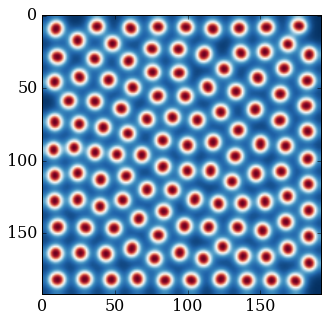

In [20]:
fig = pyplot.figure(figsize=(5,7));
ims = []

for i in range(int(nt/100)):
    im = pyplot.imshow(p[i], cmap= cm.RdBu, animated=True)
    ims.append([im])

anim = animation.ArtistAnimation(fig, ims, interval=50, blit=True)
HTML(anim.to_html5_video())

Le résultat obtenu correspond tout a fait à nos attentes et que cela représente bien un mécanisme de division cellulaire comme évoqué dans la section précédente.

Nous pouvons finalement, par curiosité réaliser une nouvelle animation pour des valeurs prédéfinies de Du, Dv, F et k correspondant au pattern "Zebrafish".

In [21]:
Du, Dv, F, k = 0.00016, 0.00008, 0.035, 0.060 # Zebrafish

U = uvinitial['U']
V = uvinitial['V']

p = Gray_scott_anim(U, V, nt, c1, c2, F, k, dt)

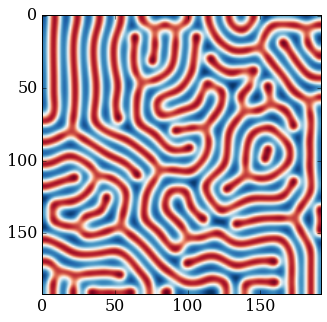

In [22]:
fig = pyplot.figure(figsize=(5,7));
ims = []

for i in range(int(nt/100)):
    im = pyplot.imshow(p[i], cmap= cm.RdBu, animated=True)
    ims.append([im])

anim = animation.ArtistAnimation(fig, ims, interval=50, blit=True)
HTML(anim.to_html5_video())

D'où nous pouvons constater avec satisfaction que ceci correspond tout à fait a ce que nous observons sur le poisson de la Figure 1.

---

##### 6. Conclusions
---

Au cours de ce tp, nous avons étudié la diffusion de deux espèces chimique suivant le modèle Gray-scott. A l'aide des techniques de résolution apprise tout au long des leçons de ce module, nous avons pu résoudre notre problème pour ensuite en déduire les valeurs de concentration de l'espèce U demandé.

Par curiosité, nous avons entrpris une brève étude des différents patterns en fonction de nos paramètres sans pour autant en déduire une quelconque conclusion générale. La question de l'influence des paramètres sur les résulats demande une étude beaucoup plus profonde. 
 
Enfin, la résolution de ce problème nous a aussi permis d'améliorer notre manière de réaliser des animations notamment celles à 2D. 
 
  Notons tout de même que notre méthode de résolution n'est pas parfaite. Elle nous donne des solutions stables à condition que les pas de temps et d'espèce soient bien choisis. Une possibilité éventuelle pour perfectionner le travail serait de résoudre le problème par un schéma dit implicite comme vu dans les leçons du module 4 contrairement au schéma explicite utilisé dans ce TP.

---

##### 7. Sources
---

[1] : http://publications.lib.chalmers.se/records/fulltext/203896/203896.pdf

[2] : http://effegua.myphotos.cc/PHP/Display_foto_Web.php?foto=Arothron%20mappa%20(pesce%20palla%20mappa)%20-%20Maldive.jpg&dir=../Maldive/Subacquee&lingua=italiano

[3] : http://mrob.com/pub/comp/xmorphia/index.html

[4] : http://matplotlib.org/examples/animation/dynamic_image2.html

---
###### La cellule ci-dessous charge le style du notebook.

In [23]:
from IPython.core.display import HTML
css_file = '../styles/numericalmoocstyle.css'
HTML(open(css_file, "r").read())